In [31]:
import pandas
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import math

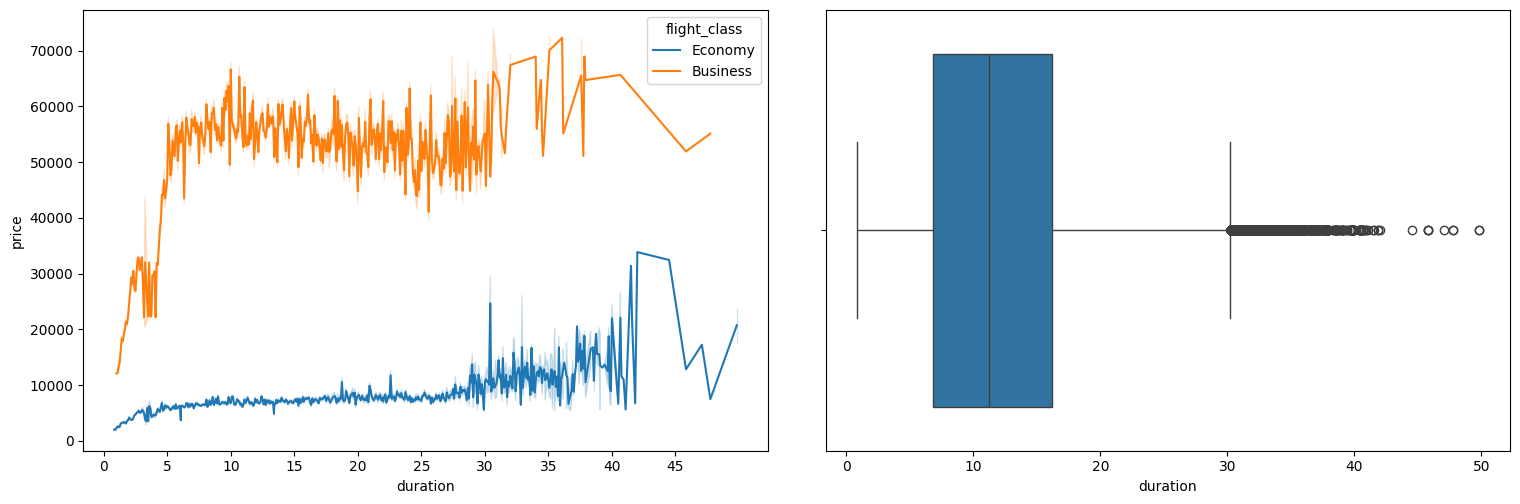

In [95]:
df = pandas.read_csv('Clean_Dataset.csv')

# Drop useless columns
columns_to_drop = ['Unnamed: 0', 'flight']
df = df.drop(columns=columns_to_drop)

# Plot price and duration
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.tight_layout()
sns.lineplot(x='duration', y='price', data=df, ax=ax[0], hue='flight_class').set_xticks(np.arange(0, 50, 5))
sns.boxplot(data=df, x='duration', ax=ax[1])
plt.show()


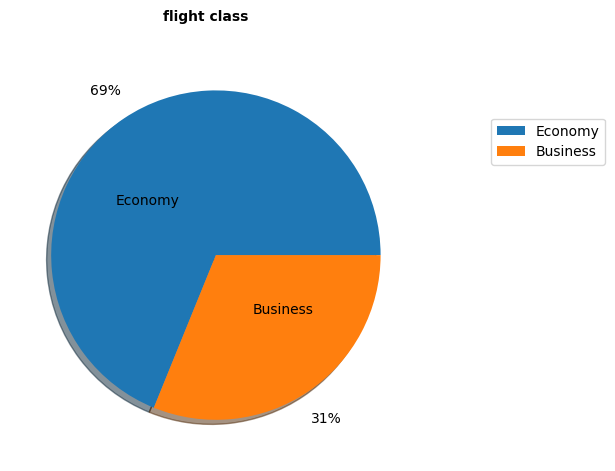

In [96]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
fig.suptitle('flight class', fontsize=10, fontweight='bold')
plt.tight_layout()
labels = df.flight_class.value_counts().index.tolist()
ax.pie(df.flight_class.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4)
ax.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)
plt.show()

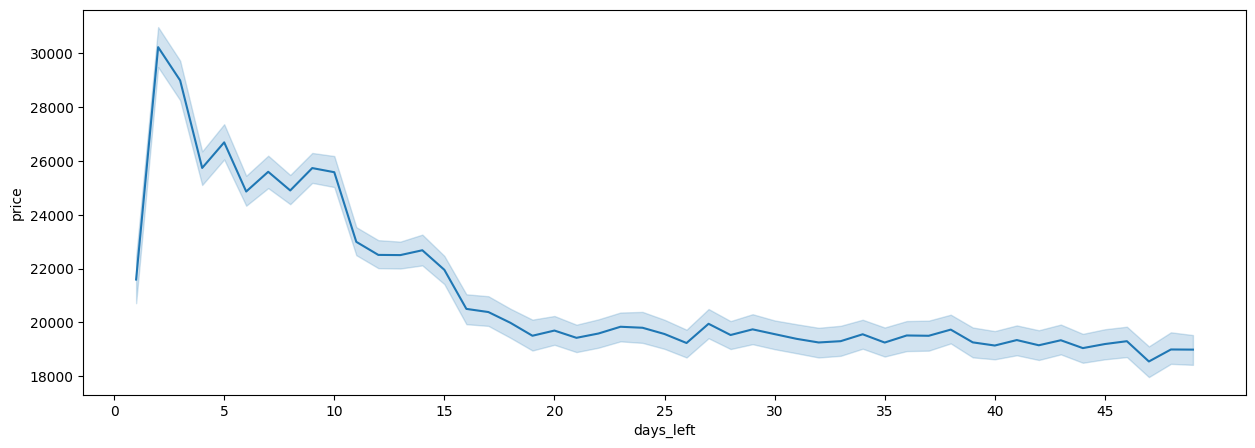

In [97]:
# Price depending on days left
plt.figure(figsize=(15, 5))
sns.lineplot(x='days_left', y='price', data=df).set_xticks(np.arange(0, 50, 5))
plt.show()

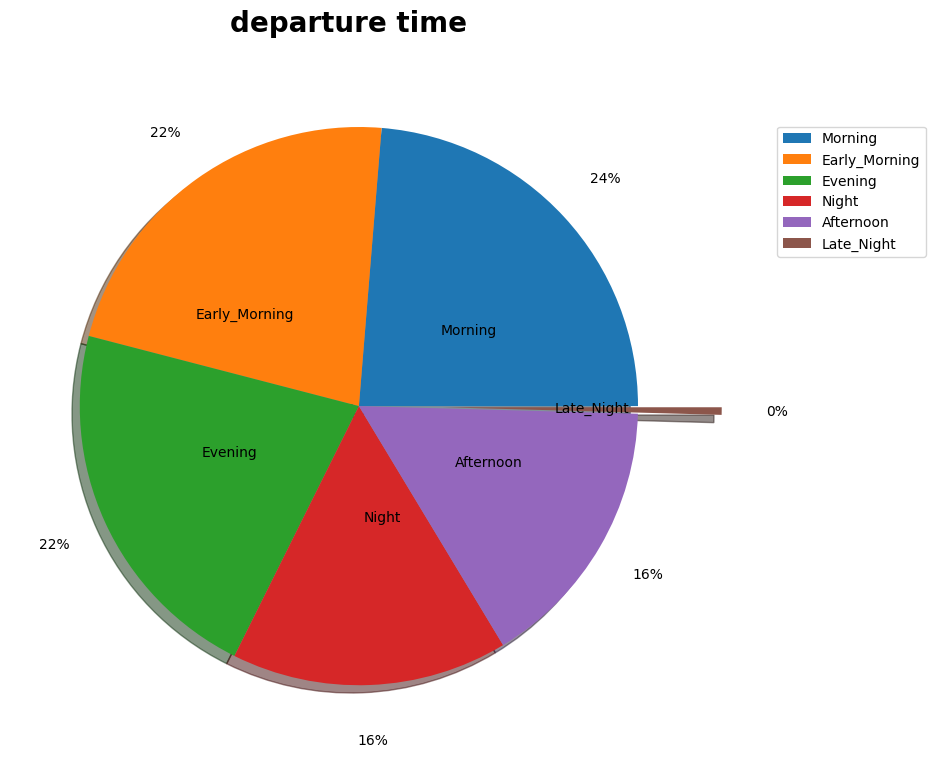

In [98]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
fig.suptitle('departure time', fontsize=20, fontweight='bold')
plt.tight_layout()

# Top ax
labels = df.departure_time.value_counts().index.tolist()
explode = (0, 0, 0, 0, 0, 0.3)
ax.pie(df.departure_time.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4, explode=explode)
ax.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

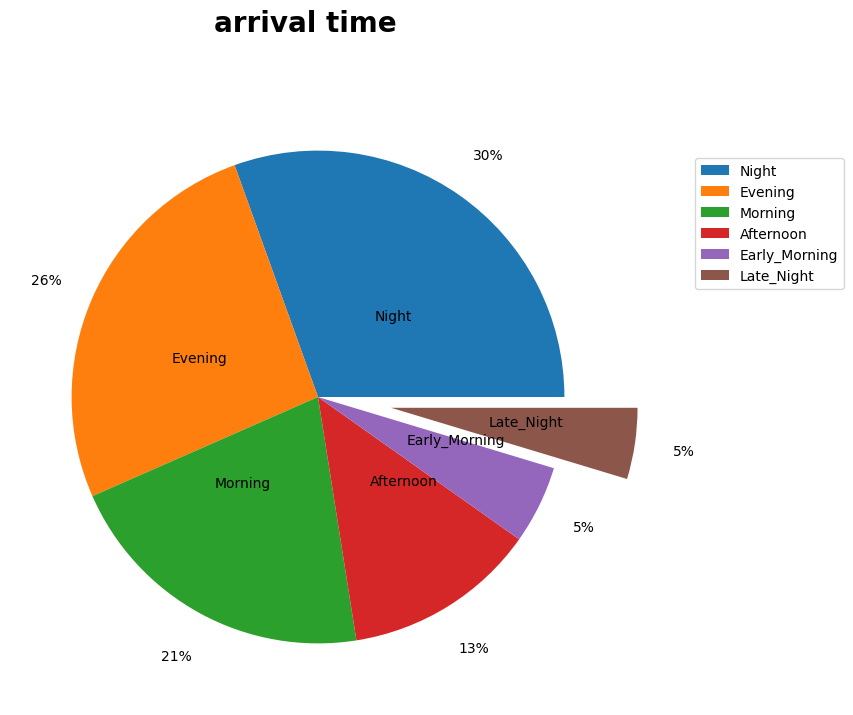

In [99]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
fig.suptitle('arrival time', fontsize=20, fontweight='bold')
labels = df.arrival_time.value_counts().index.tolist()
explode = (0, 0, 0, 0, 0, 0.3)
ax.pie(df.arrival_time.value_counts(), autopct='%.f%%', labels=labels, pctdistance=1.2, labeldistance=0.4, explode=explode)
ax.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

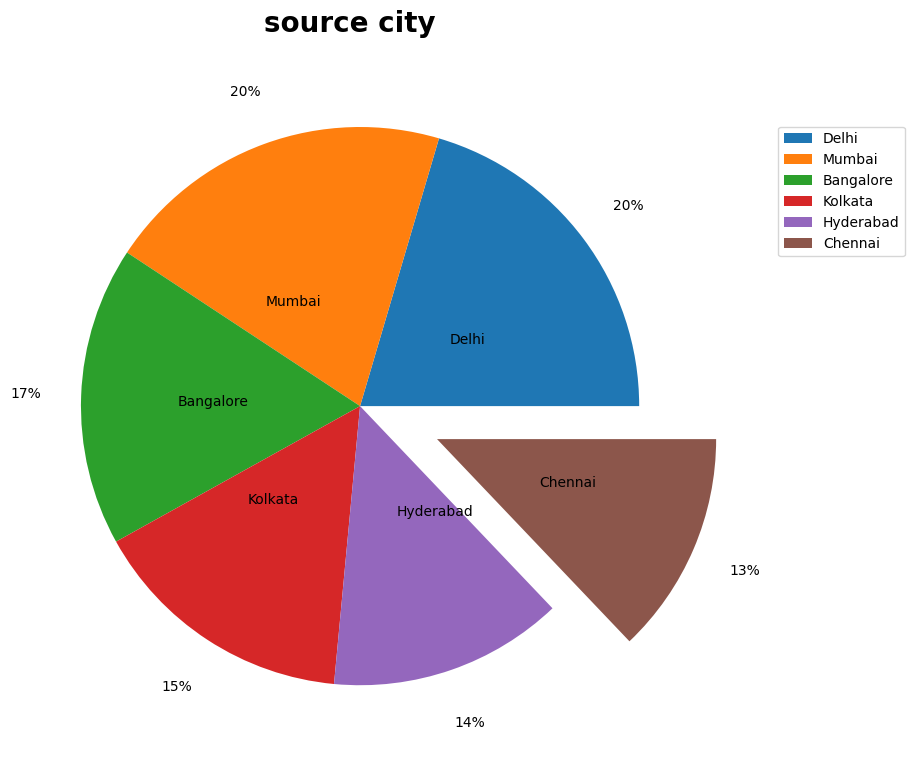

In [101]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
fig.suptitle('source city', fontsize=20, fontweight='bold')
plt.tight_layout()
labels = df.source_city.value_counts().index.tolist()
explode = (0, 0, 0, 0, 0, 0.3)
ax.pie(df.source_city.value_counts(), autopct='%.f%%', labels=labels, pctdistance=1.2, labeldistance=0.4, explode=explode)
ax.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

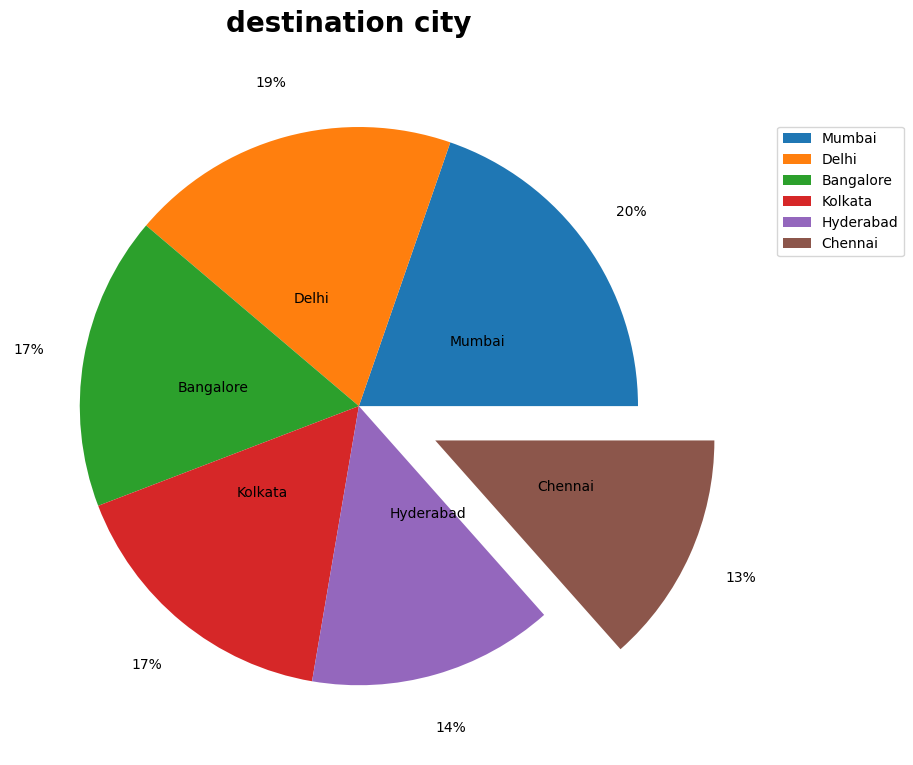

In [103]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
fig.suptitle('destination city', fontsize=20, fontweight='bold')
plt.tight_layout()
labels = df.destination_city.value_counts().index.tolist()
explode = (0, 0, 0, 0, 0, 0.3)
ax.pie(df.destination_city.value_counts(), autopct='%.f%%', labels=labels, pctdistance=1.2, labeldistance=0.4, explode=explode)
ax.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)


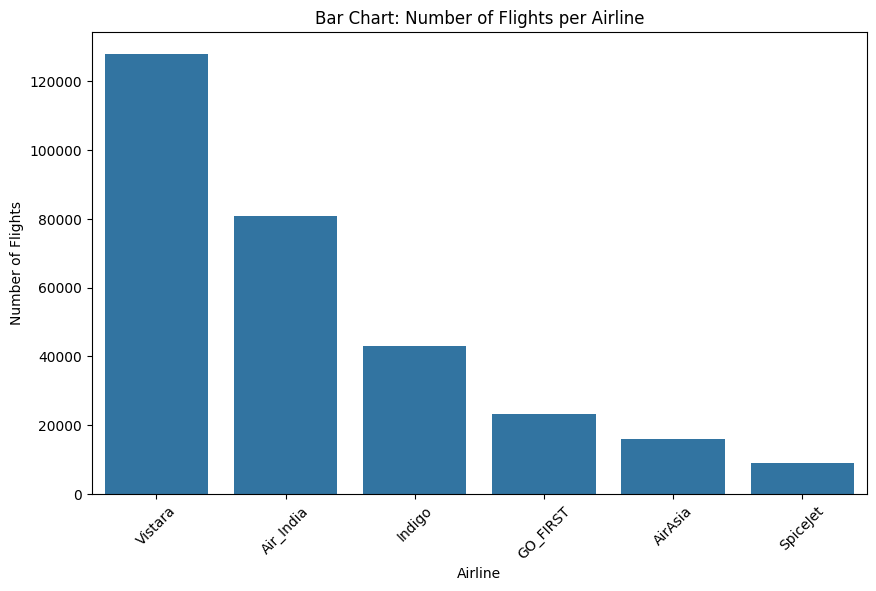

In [104]:
# Number of flights per airline
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='airline', order=df['airline'].value_counts().index)
plt.title('Bar Chart: Number of Flights per Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)  # Rotate the x-axis labels if they overlap
plt.show()

C:\Users\I\AppData\Local\Temp\ipykernel_4100\4028408712.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = '{:.1f}%'.format(percentages[i])


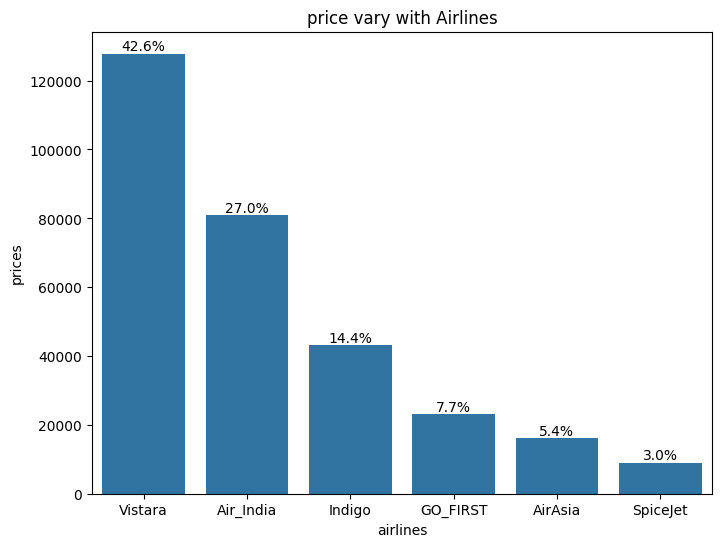

In [105]:
dm = df['airline'].value_counts()
total_customers = len(df)
percentages = dm / total_customers * 100
colors = sns.color_palette('Set3', n_colors=len(dm))
plt.figure(figsize=(8, 6))
sns.barplot(x=dm.index, y=dm)
for i, p in enumerate(plt.gca().patches):
    percentage = '{:.1f}%'.format(percentages[i])
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.5
    plt.text(x, y, percentage, ha='center', va='bottom', fontsize=10, color='black')
plt.title('price vary with Airlines')
plt.xlabel('airlines')
plt.ylabel('prices')

plt.show()

In [106]:
# Label encoding for class column
le = LabelEncoder()
df.flight_class = df.flight_class.replace({'Economy' : 1,'Business' :2})
df['airline'] = le.fit_transform(df['airline'])
df['source_city'] = le.fit_transform(df['source_city'])
df['destination_city'] = le.fit_transform(df['destination_city'])
df['departure_time'] = le.fit_transform(df['departure_time'])
df['arrival_time'] = le.fit_transform(df['arrival_time'])
df['stops'] = le.fit_transform(df['stops'])

# # One-hot encoding
# columns_to_onehot = ['airline', 'source_city', 'destination_city', 'departure_time', 'arrival_time', 'stops']

# ohe = OneHotEncoder(drop='first', sparse_output=False)
# one_hot_encoded = ohe.fit_transform(df[columns_to_onehot])

# df_encoded = pandas.DataFrame(one_hot_encoded, columns=ohe.get_feature_names_out(columns_to_onehot))
# df = pandas.concat([df.drop(columns=columns_to_onehot), df_encoded], axis=1)
# print(df)

C:\Users\I\AppData\Local\Temp\ipykernel_4100\1665905636.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.flight_class = df.flight_class.replace({'Economy' : 1,'Business' :2})


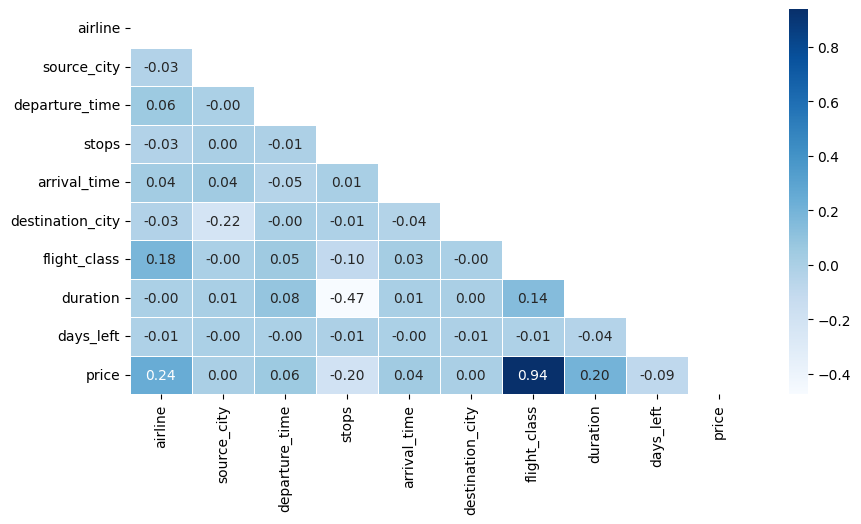

In [107]:
corr = df.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5, linecolor='white', mask=np.triu(corr), cmap='Blues')
plt.show()

In [ ]:
def get_outlier_indices(df, features):
    outlier_indices = []

    for c in features:
        Q1 = df[c].quantile(0.25)
        Q3 = df[c].quantile(0.75)
        IQR = Q3 - Q1

        outlier_step = 1.5 * IQR

        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)

    outlier_indices = list(set(outlier_indices))
    return outlier_indices

def remove_outliers(df, features):
    outlier_indices = get_outlier_indices(df, features)
    df_cleaned = df.drop(outlier_indices)
    df_cleaned.reset_index(drop=True, inplace=True)
    return df_cleaned

In [81]:
df = remove_outliers(df, ['duration', 'price'])

In [82]:
X = df.drop(columns='price')
y = df.price
df_business = df[df['flight_class'] == 2]
df_economy = df[df['flight_class'] == 1]
print(df_economy)
print(df_business)

        airline  source_city  departure_time  stops  arrival_time  \
0             4            2               2      2             5   
1             4            2               1      2             4   
2             0            2               1      2             1   
3             5            2               4      2             0   
4             5            2               4      2             4   
...         ...          ...             ...    ...           ...   
204787        5            1               1      0             5   
204788        5            1               1      0             5   
204789        5            1               0      0             4   
204790        5            1               4      0             4   
204791        5            1               5      0             5   

        destination_city  flight_class  duration  days_left  price  
0                      5             1      2.17          1   5953  
1                      5         

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)